This notebook demonstrates how to load a previously computed dataset into memory (the output of build_dataset).

It also demonstrates how to attempt to reconstruct the original signal from the mel spectogram.

Note that converting from a signal to a mel spectogram is a lossy process, and the reconstruction is only an approximation of the original signal.

Reconstruction in this way will never need to be done in this project, but it is a useful experiment to verify that the spectograms are legit

In [105]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import traceback

In [106]:
# mel spectogram parameters
MEL_N_FFT = 1024
MEL_HOP_LENGTH = 512
MEL_NUM_MELS = 128
MEL_SR = 22050

In [107]:
X = np.load("data_computed/X_test.npy")
Y = np.load("data_computed/Y_test.npy")

In [108]:
index = 4

In [109]:
Y[index]

'reggae'

In [110]:
mel_spec_db = X[index]

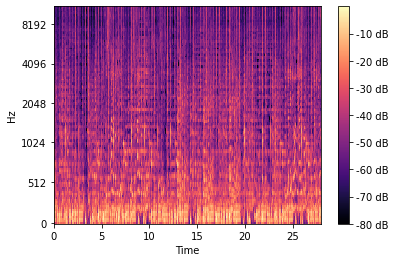

In [111]:
librosa.display.specshow(mel_spec_db, sr=MEL_SR, hop_length=MEL_HOP_LENGTH, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [112]:
mel_spec = librosa.db_to_power(mel_spec_db)

In [113]:
S_inv = librosa.feature.inverse.mel_to_stft(mel_spec, sr=MEL_SR, n_fft=MEL_HOP_LENGTH*4)
y_inv = librosa.griffinlim(S_inv, n_iter=32, hop_length=MEL_HOP_LENGTH)

In [114]:
IPython.display.display(IPython.display.Audio(y_inv, rate=MEL_SR))